Aufgabe 1: Datenexploration und Vorhersagemodell

Aufgabenstellung: 

Der Datensatz („flights.csv“) enthät Informationen über Flüge. Bitte:
- führe eine explorative Datenanalyse durch, insbesondere bezüglich der Frage, welche Faktoren/Treiber Verspätungen bei Ankünften (arr_delay) und Abflügen (dep_delay) beeinflussen.
- erstelle ein Vorhersagemodell für die binäre Aussage, ob ein Abflug mehr als 30 Minuten verspätet ist (ohne Nutzung der Verspätung der Ankunft). Nutze dazu einen geeigneten Evaluationsdatensatz.

In [1]:
import pandas as pd
import numpy as np
import missingno as mi
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os 
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(self)))
print(BASE_DIR)

NameError: name 'self' is not defined

In [2]:
df_flights = pd.read_csv('flights.csv')

In [3]:
df_flights.head() # data preview
# dep_time, sched_dep_time, arr_time, sched_arr_time in HHMM format
# dep_delay, arr_delay, air_time in minutes
# dep(arr) time in origin's(destination's) time zone

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [4]:
df_flights.info() # non-null count of each column and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

INVESTIGATE MISSING DATA

In [6]:
df_flights.isnull().any() # booleans if values missing in column

year              False
month             False
day               False
dep_time           True
sched_dep_time    False
dep_delay          True
arr_time           True
sched_arr_time    False
arr_delay          True
carrier           False
flight            False
tailnum            True
origin            False
dest              False
air_time           True
distance          False
hour              False
minute            False
time_hour         False
dtype: bool

In [7]:
df_flights.isnull().sum() # number of missing in each column

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

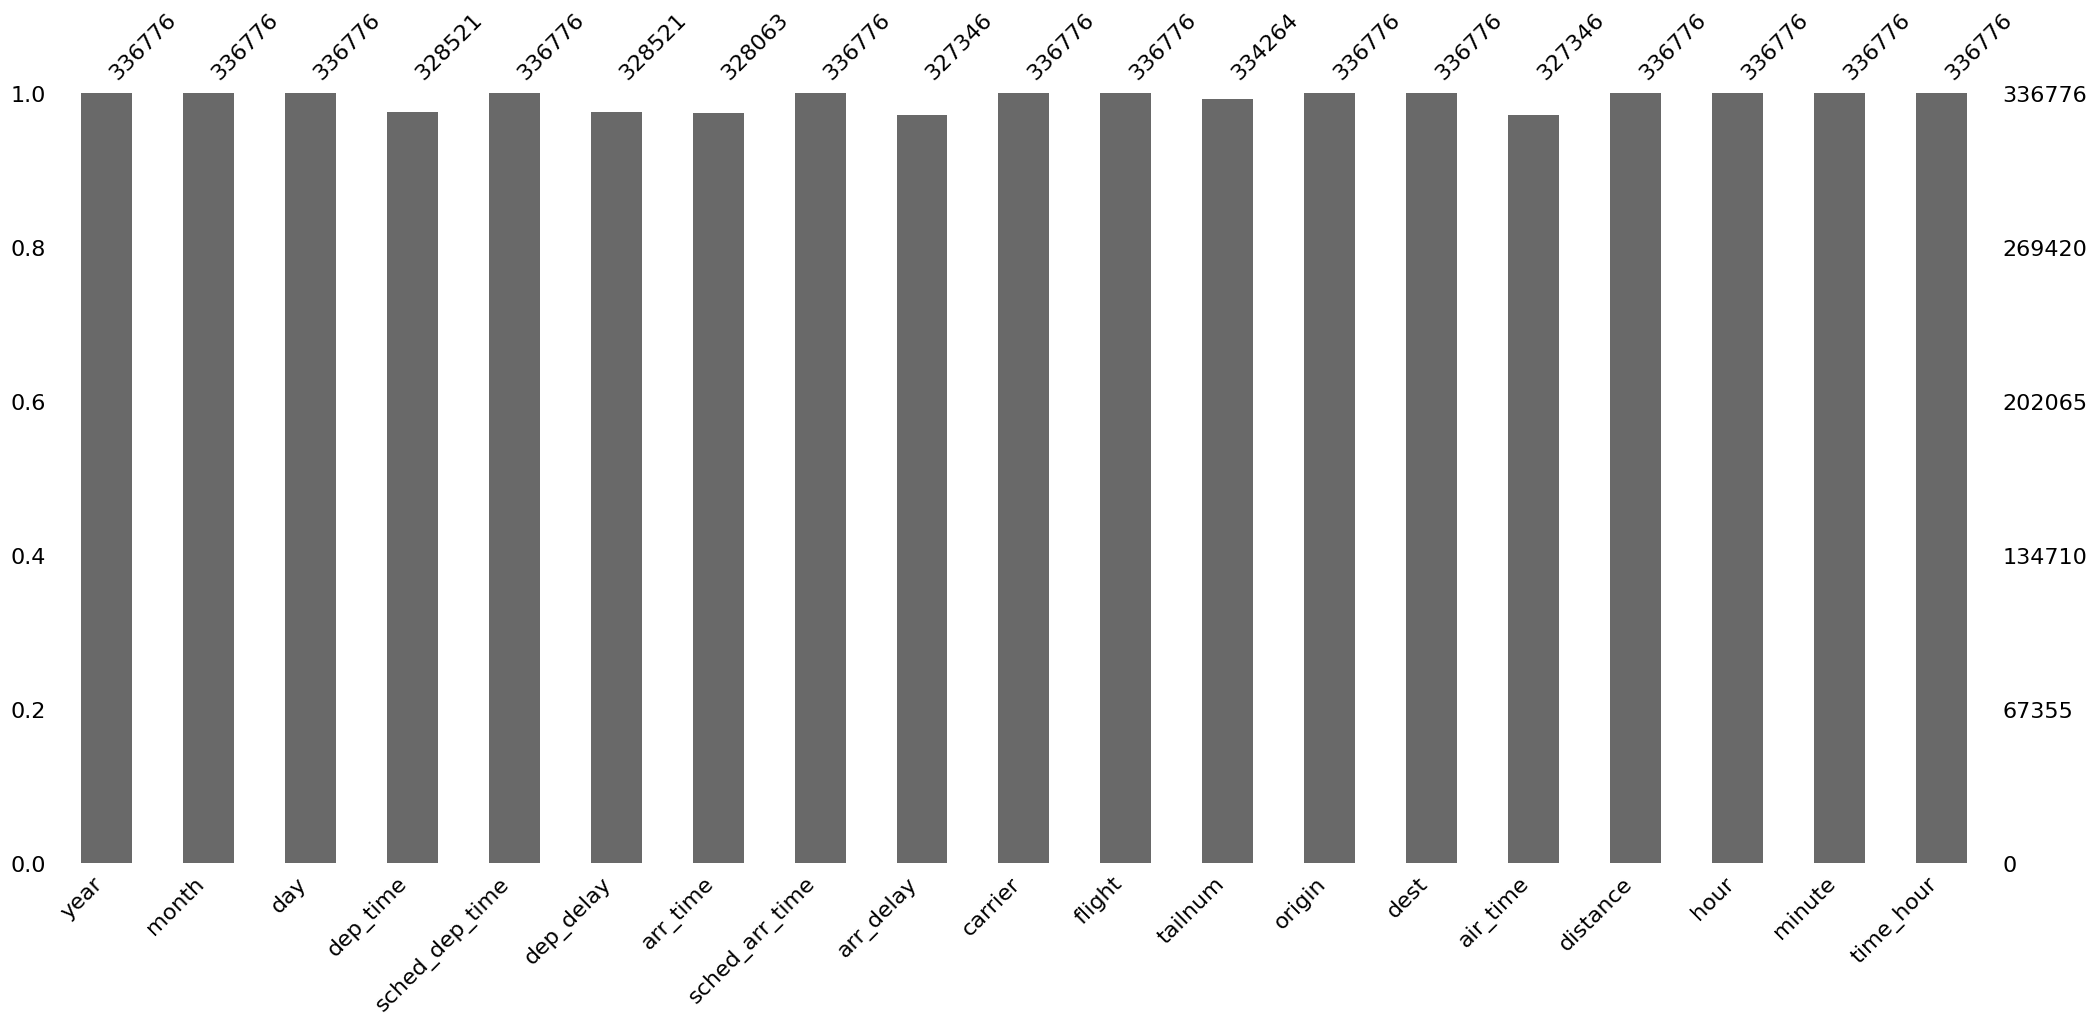

In [9]:
mi.bar(df_flights)
plt.show()
# proportionally, not a lot of the data is missing

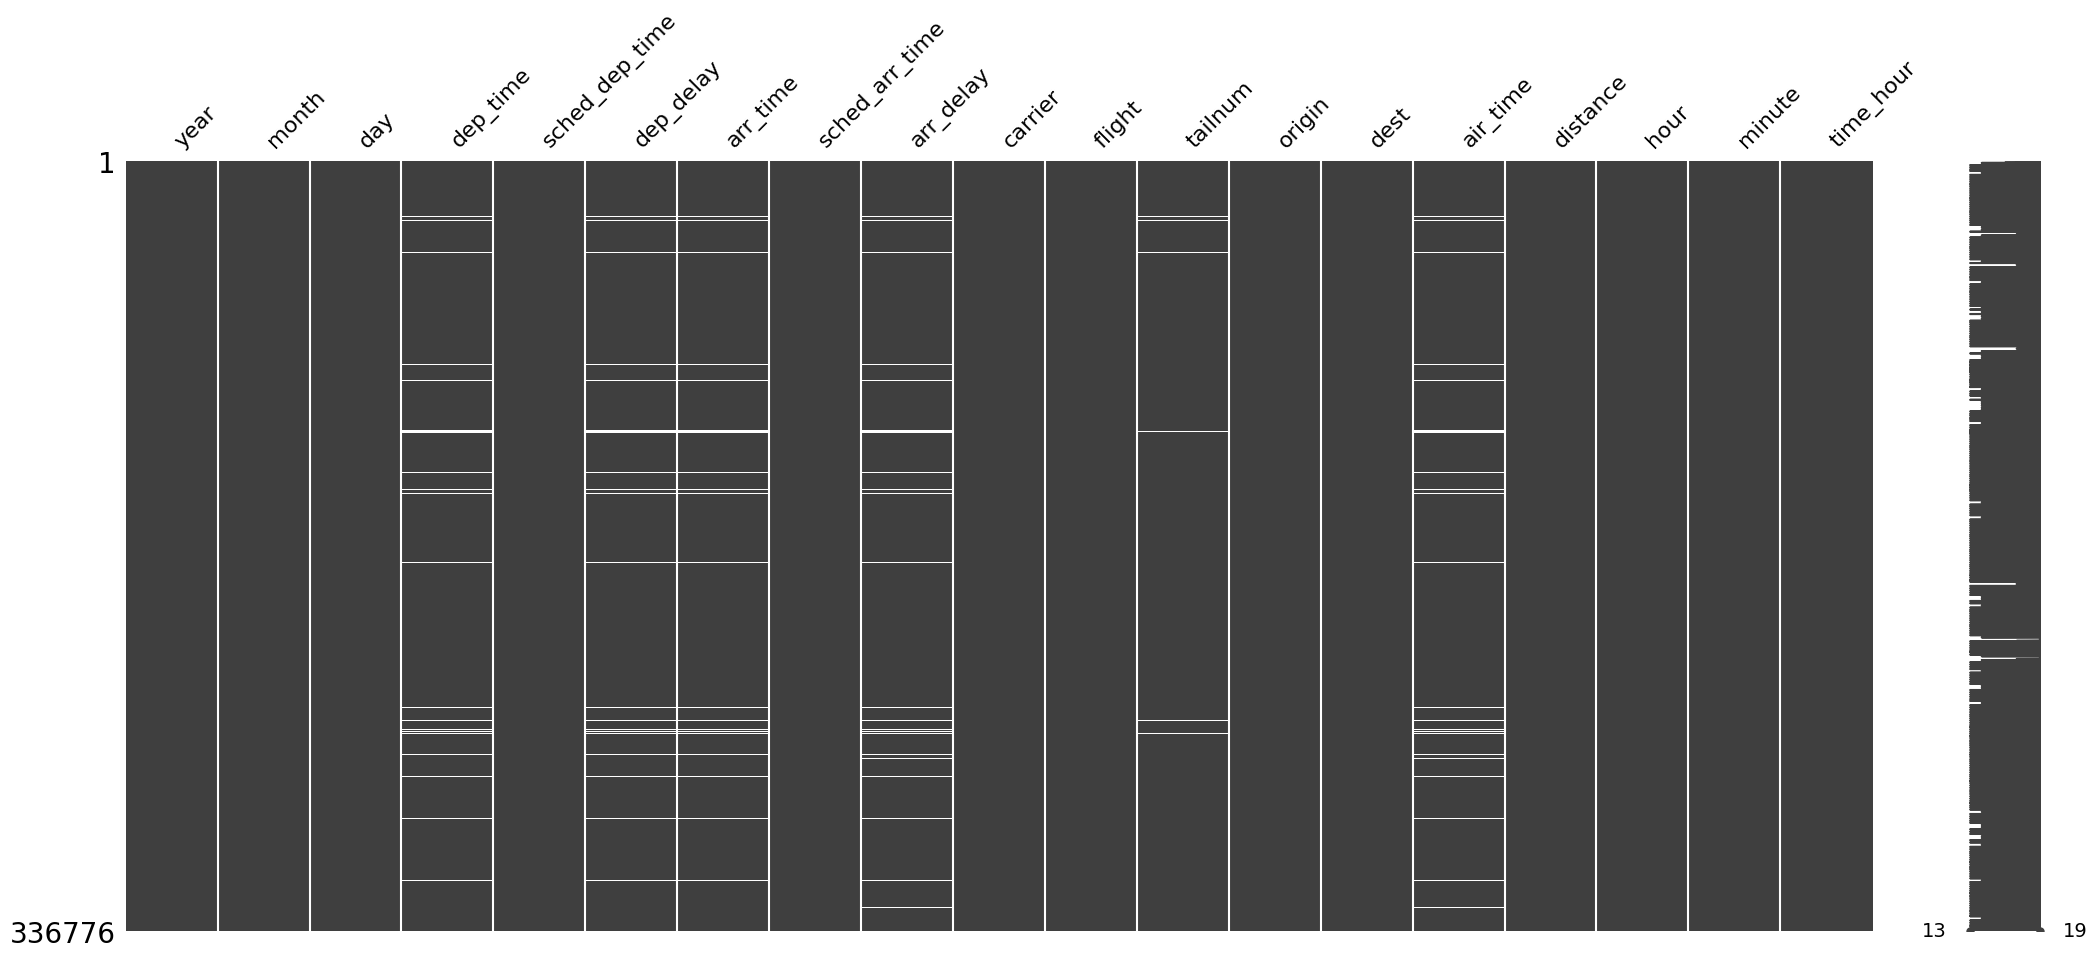

In [10]:
mi.matrix(df_flights)
plt.show()
# dep_time, dep_delay, arr_time, arr_delay, air_time tend to miss in the same observations

In [ ]:
# TRY TO DERIVE DELAY TIMES FROM SCHEDULED AND ACTUAL TO FILL MISSING VALUES
# function to convert HHMM format to minutes past midnight
# def hhmm_to_minutes(t):
#    if pd.isnull(t):
#        return np.nan
#    else:
#        t = int(t)
#        return t // 100 * 60 + t % 100

In [ ]:
# apply the function to the time columns
# for col in ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time']:
#    df_flights[col] = df_flights[col].apply(hhmm_to_minutes)

# fill dep_delay and arr_delay where possible
# df_flights['dep_delay'] = df_flights['dep_time'] - df_flights['sched_dep_time']
# df_flights['arr_delay'] = df_flights['arr_time'] - df_flights['sched_arr_time']

# get the minimum delays to account for day change and not delay case
# min_dep_delay = df_flights['dep_delay'].min()
# min_arr_delay = df_flights['arr_delay'].min()

# adjust for day changes
# df_flights.loc[df_flights['dep_delay'] == min_dep_delay, 'dep_delay'] += 24 * 60
# df_flights.loc[df_flights['arr_delay'] == min_arr_delay, 'arr_delay'] += 24 * 60

I also tried calculating air_time, but was not getting the correct results. Search concluded: air_time is not directly calculated from the departure and arrival times (dep_time and arr_time). This is because dep_time and arr_time include the time spent taxiing on the runway, which is not considered air_time.

Instead, air_time is usually recorded by the aircraft’s systems or determined through other means by the airline. It’s part of the flight data that airlines report, so it’s an input to the dataset and not a value calculated from other columns. Also, even if it were directly dependent, I don't have the time zone difference info to calculate it. 

HANDLE MISSING DATA

Risk: If the variables under analysis are statistically related to the "missingness" then ignoring the missing data will induce bias in your inferences.

-> See if values are Missing Completely At Random, before you remove them (complete-case analysis).

In [11]:
# look for higher correlation betweeen missing values of delays and specific carriers.
num_unique_carriers = df_flights['carrier'].nunique()
print(f'There are {num_unique_carriers} unique carriers.')

There are 16 unique carriers.


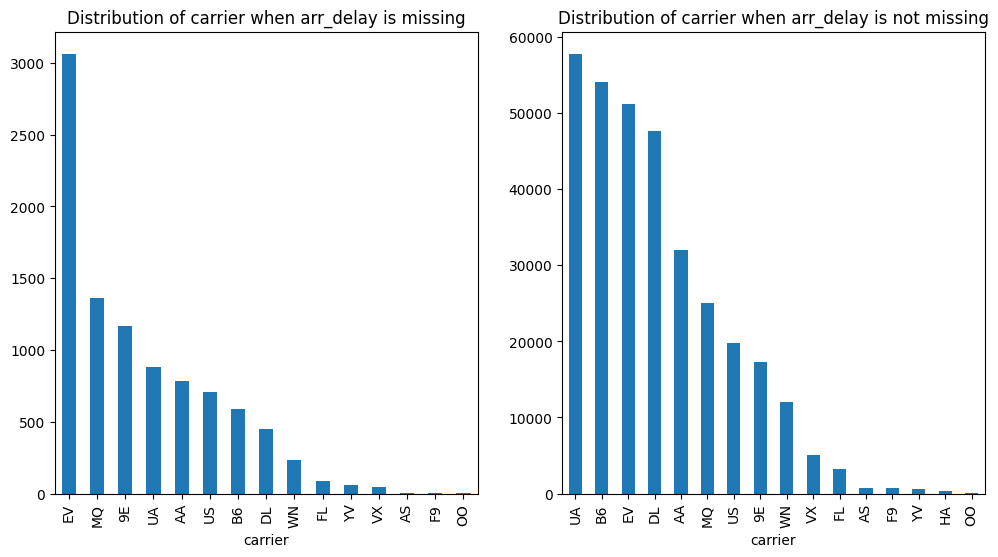

In [12]:
# COMPARE DISTRIBUTIONS OF carrier WHEN arr_delay -missing, -not missing

# series with carrier values for all rows in df_flights where arr_delay is missing
missing_arr_delay = df_flights[df_flights['arr_delay'].isnull()]['carrier']
# series with carrier values for all rows in df_flights where arr_delay is not missing
not_missing_arr_delay = df_flights[df_flights['arr_delay'].notnull()]['carrier']

# compare the distributions
plt.figure(figsize=(12, 6))

# first plot in 1x2 plot
plt.subplot(1, 2, 1)
missing_arr_delay.value_counts().plot(kind='bar')
plt.title('Distribution of carrier when arr_delay is missing')

plt.subplot(1, 2, 2)
not_missing_arr_delay.value_counts().plot(kind='bar')
plt.title('Distribution of carrier when arr_delay is not missing')

plt.show()

# distributions look dissimilar
# suggests that the missingness of arr_delay correlated with the carrier

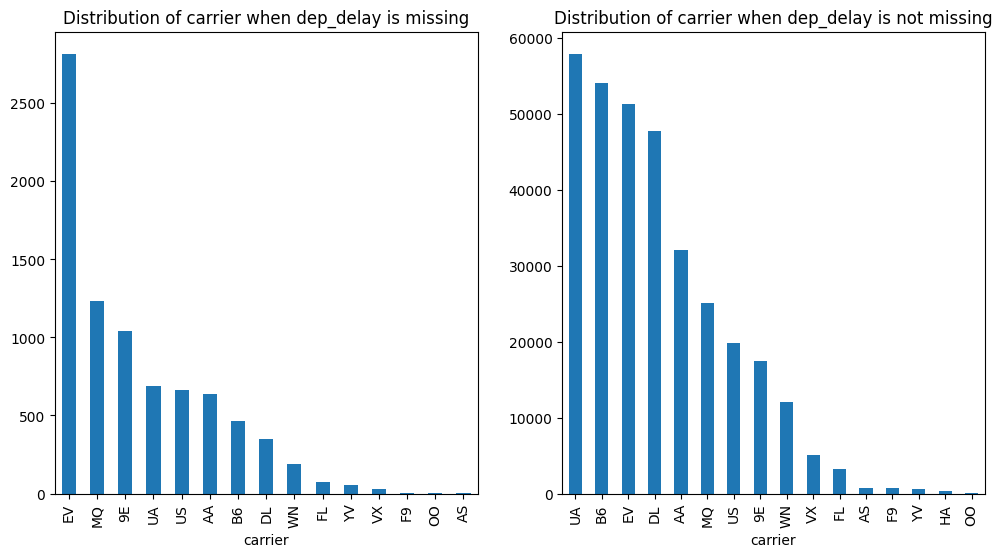

In [13]:
# COMPARE DISTRIBUTIONS OF carrier WHEN dep_delay -missing, -not missing

# series with carrier values for all rows in the DataFrame df_flights where dep_delay is missing
missing_dep_delay = df_flights[df_flights['dep_delay'].isnull()]['carrier']
# series with carrier values for all rows in df_flights where dep_delay is not missing
not_missing_dep_delay = df_flights[df_flights['dep_delay'].notnull()]['carrier']

# compare the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
missing_dep_delay.value_counts().plot(kind='bar')
plt.title('Distribution of carrier when dep_delay is missing')

plt.subplot(1, 2, 2)
not_missing_dep_delay.value_counts().plot(kind='bar')
plt.title('Distribution of carrier when dep_delay is not missing')

plt.show()
# distributions look dissimilar
# suggests that the missingness of dep_delay correlated with the carrier
# leaving for future exploration as well as correlation with other variables

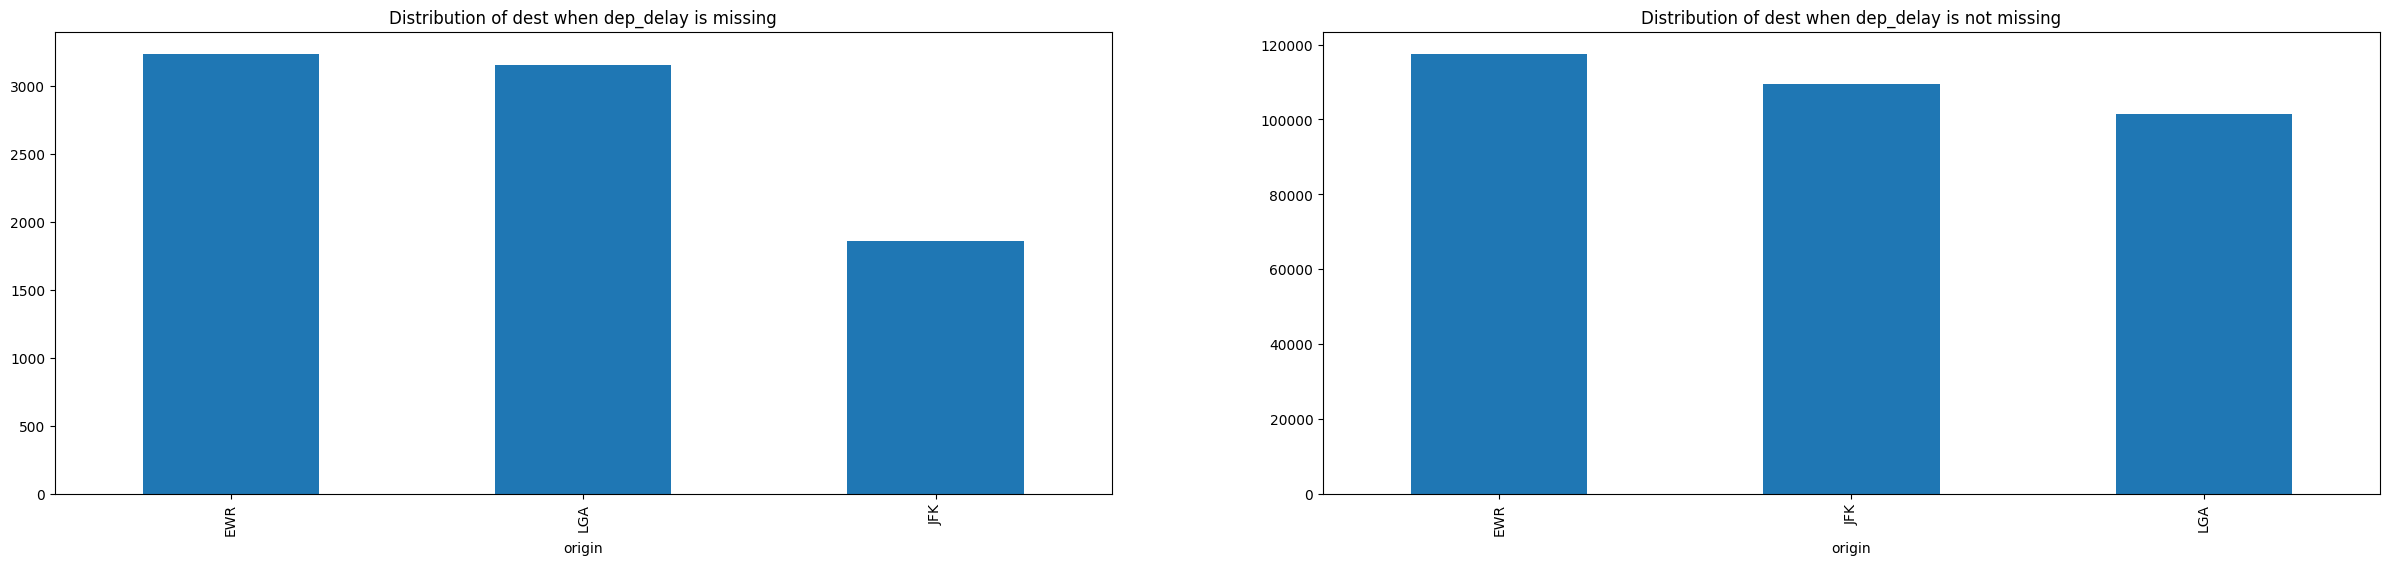

In [15]:
# COMPARE DISTRIBUTIONS OF origin WHEN dep_delay -missing, -not missing

# series with destination values for all rows in the DataFrame df_flights where dep_delay is missing
missing_dep_delay = df_flights[df_flights['dep_delay'].isnull()]['origin']
# series with destination values for all rows in df_flights where dep_delay is not missing
not_missing_dep_delay = df_flights[df_flights['dep_delay'].notnull()]['origin']

# compare the distributions
plt.figure(figsize=(30, 6))

plt.subplot(1, 2, 1)
missing_dep_delay.value_counts().plot(kind='bar')
plt.title('Distribution of origin when dep_delay is missing')

plt.subplot(1, 2, 2)
not_missing_dep_delay.value_counts().plot(kind='bar')
plt.title('Distribution of origin when dep_delay is not missing')

plt.show()
# distributions look dissimilar
# suggests that the missingness of dep_delay correlated with the the origin

Correlation between number of missing values and carrier, origin observed. Signs that values are not missing completely at random.
Possible actions:
- Imputation: fill in the missing values based on calculations using other variables
- Imputation: fill in the missing values based on the values of carrier (median or mean) 
- Modeling: fit model to data and use model parameters instead of observations for analysis

Important! state found correlation with the results

- führe eine explorative Datenanalyse durch, insbesondere bezüglich der Frage, welche Faktoren/Treiber Verspätungen bei Ankünften (arr_delay) und Abflügen (dep_delay) beeinflussen.
- erstelle ein Vorhersagemodell für die binäre Aussage, ob ein Abflug mehr als 30 Minuten verspätet ist (ohne Nutzung der Verspätung der Ankunft). Nutze dazu einen geeigneten Evaluationsdatensatz.

For simplicity and to complete the task within the time limit, assume values missing completely at random and omit incomplete observations.

In [16]:
df_flights_nona = df_flights.dropna().copy()

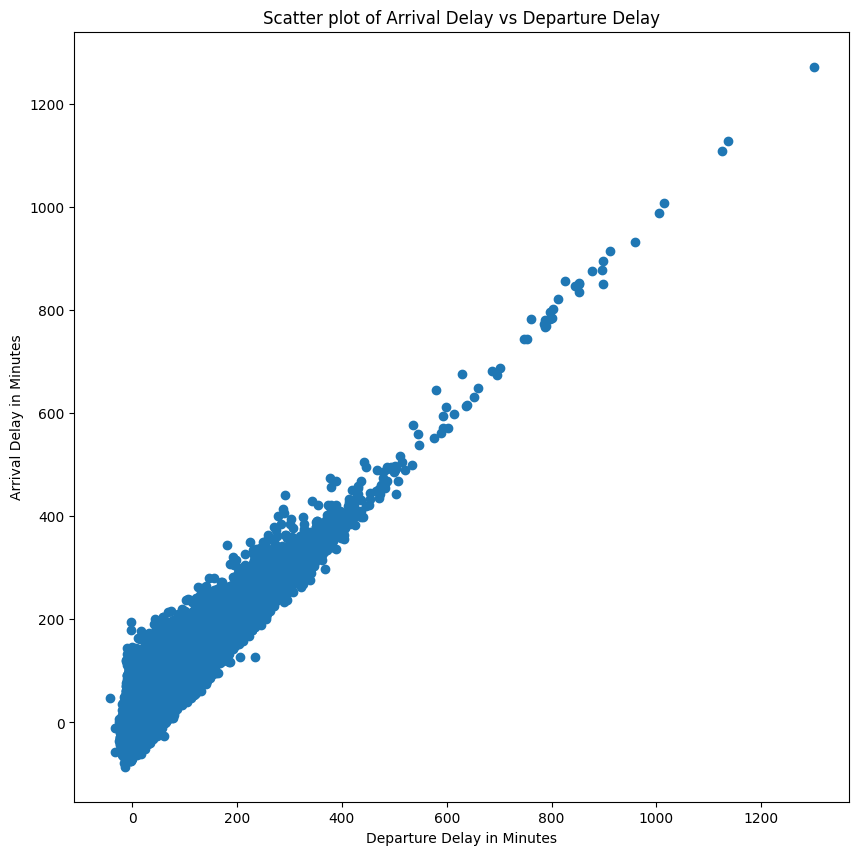

In [17]:
# scatter plots to check correlation betweeen dep_delay and arr_delay
plt.figure(figsize=(10, 10))
plt.scatter(df_flights_nona['dep_delay'], df_flights_nona['arr_delay'])
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')
plt.title('Scatter plot of Arrival Delay vs Departure Delay')
plt.show()
# positively correlated a expected
# in most cases departure delay implies at least as much arrival delay
# in most cases, arrival delay is larger than departure delay 
# -> subject for further analysis with more data variables (weather conditions, destination airport conditions)

DEPARTURE DELAY: NUMERIC DATA ANALYSIS

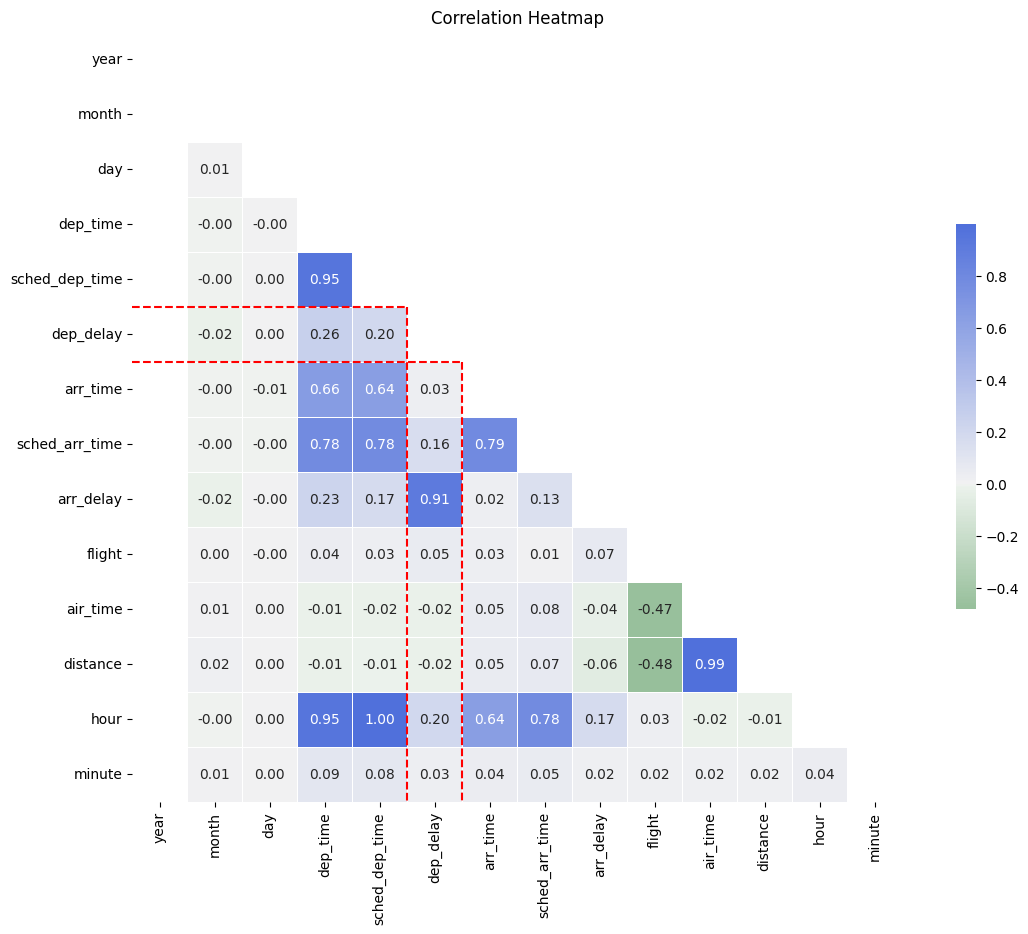


Correlations of dep_delay variable:
year                   NaN
month            -0.020055
day               0.000591
dep_time          0.259613
sched_dep_time    0.198924
dep_delay         1.000000
arr_time          0.029421
sched_arr_time    0.160497
arr_delay         0.914803
flight            0.053970
air_time         -0.022405
distance         -0.021681
hour              0.198269
minute            0.028251
Name: dep_delay, dtype: float64


In [21]:
# CORRELATION HEAT MAP OF NUMERIC VALUES
# only numeric columns
numeric_cols = df_flights_nona.select_dtypes(include=np.number)

# correlation matrix
corr = numeric_cols.corr()

# mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.triu(np.ones_like(corr, dtype=bool))

# custom diverging colormap
cmap = sns.diverging_palette(130, 260, as_cmap=True)

# draw the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# get the index of the 'dep_delay' column/row
index_dep = list(corr.columns).index('dep_delay')

# outline the 'dep_delay' column and row
plt.hlines([index_dep], xmin=0, xmax=index_dep, color='red', linestyles='dashed')
plt.hlines([index_dep+1], xmin=0, xmax=index_dep+1, color='red', linestyles='dashed')
plt.vlines([index_dep], ymin=index_dep, ymax=len(corr.columns), color='red', linestyles='dashed')
plt.vlines([index_dep+1], ymin=index_dep+1, ymax=len(corr.columns), color='red', linestyles='dashed')

plt.title('Correlation Heatmap')
plt.show()

print()
print('Correlations of dep_delay variable:' )
print(corr['dep_delay'])

DEPARTURE DELAY: CATEGORICAL DATA ANALYSIS (CARRIER AND DESTINATION)

In [34]:
# DEPARTURE DELAY BY CARRIER
# In the following, the % of departures delayed by over X minutes is calculated for each carrier
# the output is sorted descending by % departures delayed by over 30 minutes

medians = df_flights_nona.groupby('carrier')['dep_delay'].median()

# calculate the number of flights by each carrier
num_flights_carrier = df_flights_nona.groupby('carrier').size()

# calculate the most frequent origin for each carrier
most_frequent_origin = df_flights_nona.groupby('carrier')['origin'].agg(lambda x:x.value_counts().index[0])
num_flights_most_frequent_origin = df_flights_nona.groupby('carrier')['origin'].agg(lambda x:x.value_counts().values[0])

# calculate the percentage of flights with delays > 0
delayed_dep_flights_carrier = df_flights_nona[df_flights_nona['dep_delay'] > 0].groupby('carrier').size()
percentage_dep_delay_carrier = (delayed_dep_flights_carrier / num_flights_carrier) * 100

# calculate the percentage of flights with delays > 30
dep_delay_over_30_carrier = df_flights_nona[df_flights_nona['dep_delay'] > 30].groupby('carrier').size()
percentage_dep_delay_over_30_carrier = (dep_delay_over_30_carrier / num_flights_carrier) * 100

# calculate the percentage of flights with delays > 120
dep_delay_over_120_carrier = df_flights_nona[df_flights_nona['dep_delay'] > 120].groupby('carrier').size()
percentage_dep_delay_over_120_carrier = (dep_delay_over_120_carrier / num_flights_carrier) * 100

# calculate the percentage of flights from the most frequent origin
percentage_most_frequent_origin = (num_flights_most_frequent_origin / num_flights_carrier) * 100

# combine the series into a dataframe
df_dep_delay_carrier = pd.DataFrame({
    'MedianDelay': medians,
    'NumFlights': num_flights_carrier,
    'MostFrequentOrigin': most_frequent_origin, 
    'PercentageMostFrequentOrigin': percentage_most_frequent_origin,
    'PercentageDelays': percentage_dep_delay_carrier,
    'PercentageDelaysOver30': percentage_dep_delay_over_30_carrier,
    'PercentageDelaysOver120': percentage_dep_delay_over_120_carrier
})

# sort by blank
top_dep_delay_carrier = df_dep_delay_carrier.sort_values(by='PercentageDelaysOver30', ascending=False)

print(top_dep_delay_carrier)

         MedianDelay  NumFlights MostFrequentOrigin  \
carrier                                               
EV              -1.0       51108                EWR   
YV              -2.0         544                LGA   
F9               0.0         681                LGA   
9E              -2.0       17294                JFK   
OO              -6.0          29                LGA   
FL               1.0        3175                LGA   
WN               1.0       12044                EWR   
B6              -1.0       54049                JFK   
MQ              -3.0       25037                LGA   
UA               0.0       57782                EWR   
VX               0.0        5116                JFK   
AA              -3.0       31947                LGA   
DL              -2.0       47658                LGA   
AS              -3.0         709                EWR   
US              -4.0       19831                LGA   
HA              -4.0         342                JFK   

         

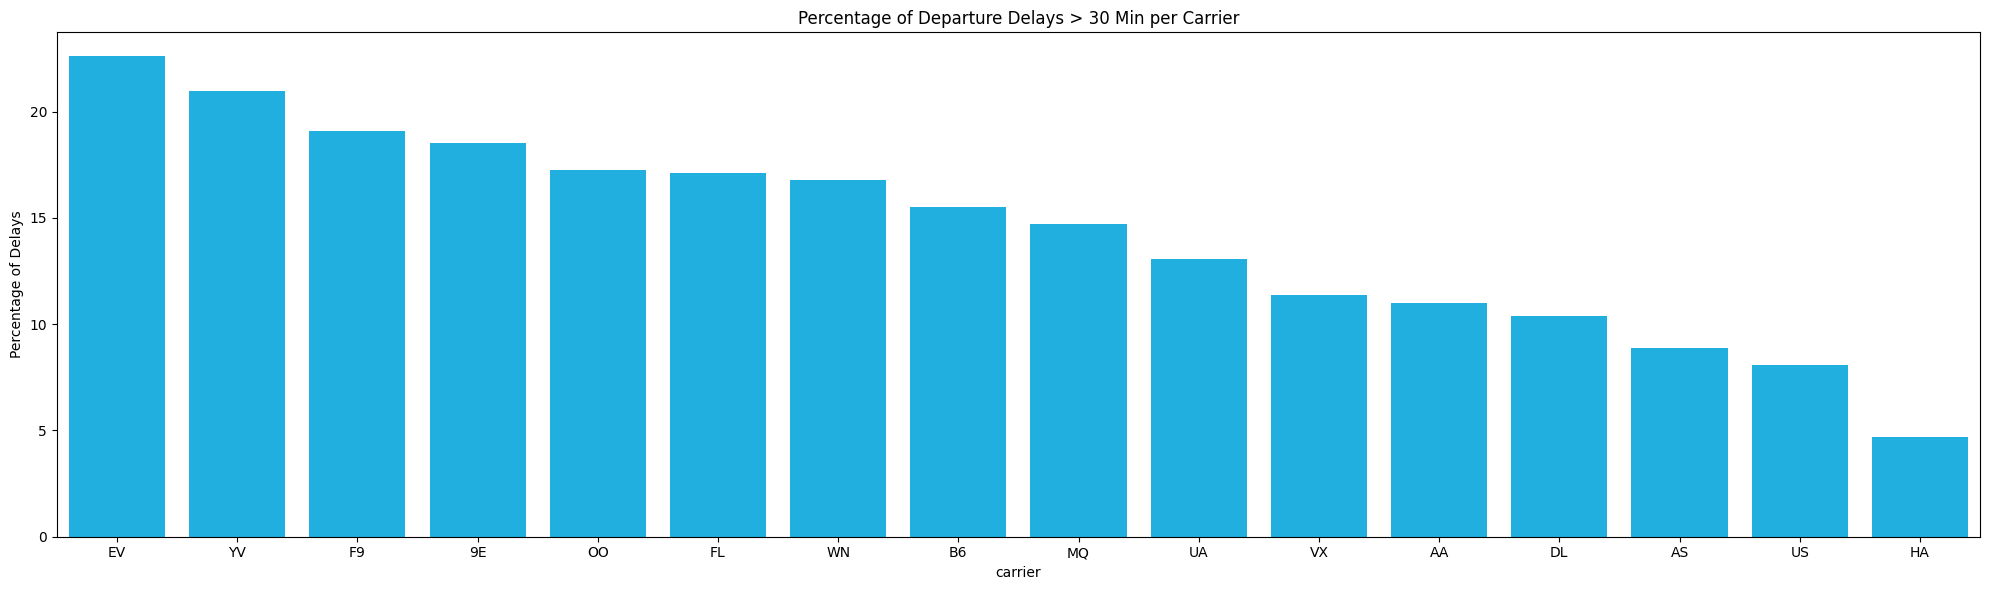

In [26]:
# DEPARTURE DELAY BY CARRIER
# In the following, % departures delayed by over 30 minutes are plotted for each carrier

# create the plots
fig, axs = plt.subplots(figsize=(20, 6))

sns.barplot(x=top_dep_delay_carrier.index, y='PercentageDelaysOver30', data=top_dep_delay_carrier, color='#00BFFF', ax=axs)
axs.set_title('Percentage of Departure Delays > 30 Min per Carrier')
axs.set_ylabel('Percentage of Delays')

plt.tight_layout()
plt.show()


In [27]:
# 9E and US have a similar number of flights, but a difference of 10% in proportion of delayed flights over 30 minutes
# let's look at what sets them apart by sched_dep_time, distance, origin

# filter on carrier
df_9E = df_flights_nona[df_flights_nona['carrier'] == '9E']
df_US = df_flights_nona[df_flights_nona['carrier'] == 'US']

columns_of_interest = ['sched_dep_time', 'distance']

# descriptive statistics for carrier
desc_9E = df_9E[columns_of_interest].describe().loc[['mean', 'min', 'max', '50%']]
desc_US = df_US[columns_of_interest].describe().loc[['mean', 'min', 'max', '50%']]

# most frequent origin for carrier 9E
top_origin_9E = df_9E['origin'].value_counts().idxmax()
percentage_frequency_9E = df_9E['origin'].value_counts().max()/num_flights_carrier['9E']

# least frequent origin for carrier 9E
bot_origin_9E = df_9E['origin'].value_counts().idxmin()
bot_percentage_frequency_9E = df_9E['origin'].value_counts().min()/num_flights_carrier['9E']

# most frequent origin for carrier US
top_origin_US = df_US['origin'].value_counts().idxmax()
percentage_frequency_US = df_US['origin'].value_counts().max()/num_flights_carrier['US']

# least frequent origin for carrier US
bot_origin_US = df_US['origin'].value_counts().idxmin()
bot_percentage_frequency_US = df_US['origin'].value_counts().min()/num_flights_carrier['US']

print("Descriptive statistics for carrier 9E:")
print(desc_9E)

print("Most frequent origin for carrier 9E:")
print(f"Origin: {top_origin_9E}, Frequency: {percentage_frequency_9E}")

print("\nLeast frequent origin for carrier 9E:")
print(f"Origin: {bot_origin_9E}, Frequency: {bot_percentage_frequency_9E}")

print("\nDescriptive statistics for carrier US:")
print(desc_US)

print("\nMost frequent origin for carrier US:")
print(f"Origin: {top_origin_US}, Frequency: {percentage_frequency_US}")

print("\nLeast frequent origin for carrier US:")
print(f"Origin: {bot_origin_US}, Frequency: {bot_percentage_frequency_US}")

# Note: 50% of US flights are before noon -> sched_dep_time could be a deciding factor in dep_delay
# Note: 80% of US flights originate from JFK, while only 14% 9E fights are there -> origin could be a deciding factor in dep_delay

Descriptive statistics for carrier 9E:
      sched_dep_time     distance
mean     1462.459119   529.889615
min       600.000000    94.000000
max      2200.000000  1587.000000
50%      1550.000000   509.000000
Most frequent origin for carrier 9E:
Origin: JFK, Frequency: 0.7946108476928414

Least frequent origin for carrier 9E:
Origin: EWR, Frequency: 0.06898346247253383

Descriptive statistics for carrier US:
      sched_dep_time     distance
mean     1240.375876   560.825929
min       500.000000    94.000000
max      2120.000000  2153.000000
50%      1200.000000   529.000000

Most frequent origin for carrier US:
Origin: LGA, Frequency: 0.6323937269930916

Least frequent origin for carrier US:
Origin: JFK, Frequency: 0.14946296202914627


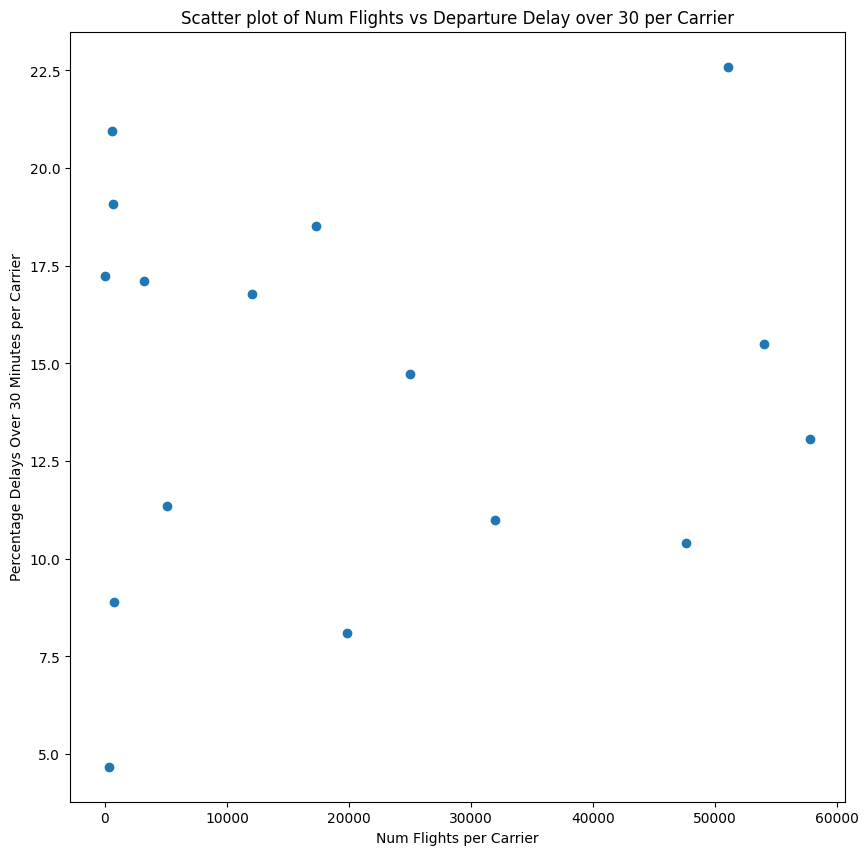

In [35]:
# scatter plots to check correlation betweeen NumFlights and PercentageDelaysOver30
plt.figure(figsize=(10, 10))
plt.scatter(num_flights_carrier, percentage_dep_delay_over_30_carrier)
plt.xlabel('Num Flights per Carrier')
plt.ylabel('Percentage Delays Over 30 Minutes per Carrier')
plt.title('Scatter plot of Num Flights vs Departure Delay over 30 per Carrier')
plt.show()
# no correlation

In [28]:
num_unique_origins = df_flights_nona['origin'].nunique()
print(f"There are {num_unique_origins} unique origin values in the df_flights(_nona) DataFrame.")

There are 3 unique origin values in the df_flights(_nona) DataFrame.


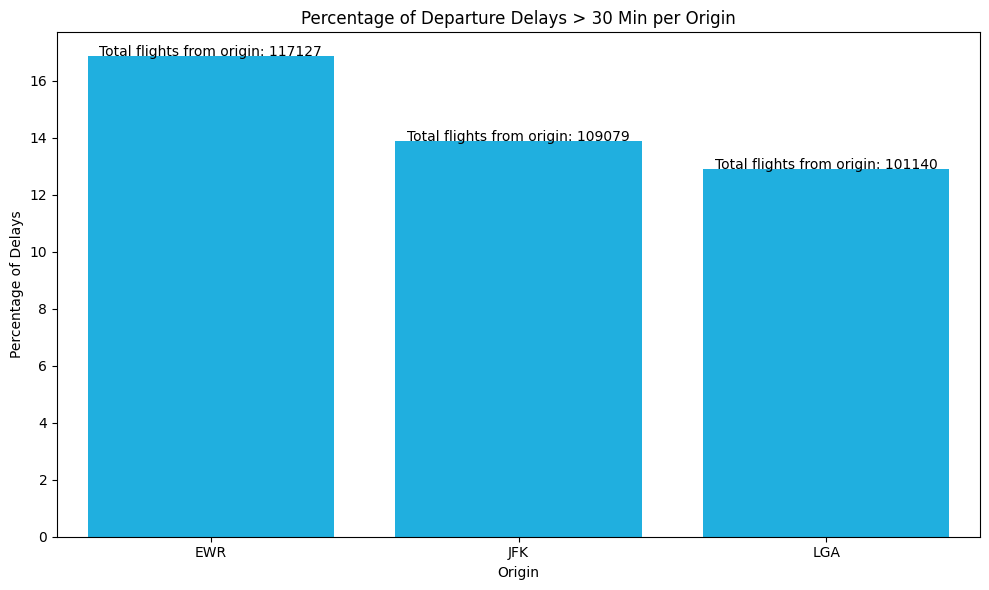

In [29]:
# DEPARTURE DELAY BY ORIGIN
# plot % of departures delayed by over 30 minutes for each origin

# calculate the number of flights from each origin
num_flights_origin = df_flights_nona.groupby('origin').size()

# calculate the number of flights with departure delays > 30
delayed_dep_flights_origin_30 = df_flights_nona[df_flights_nona['dep_delay'] > 30].groupby('origin').size()

# calculate the percentage of flights with departure delays > 30
percentage_dep_delay_origin_30 = (delayed_dep_flights_origin_30 / num_flights_origin) * 100

# create DataFrame for plotting
df_plot_30 = pd.DataFrame({'Origin': percentage_dep_delay_origin_30.index, 'PercentageDelaysOver30': percentage_dep_delay_origin_30.values})

# create the plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Origin', y='PercentageDelaysOver30', data=df_plot_30, color='#00BFFF', ax=ax)
ax.set_title('Percentage of Departure Delays > 30 Min per Origin')
ax.set_ylabel('Percentage of Delays')

# add number of flights per origin as text annotations
for i, origin in enumerate(df_plot_30['Origin']):
    num_flights = num_flights_origin[origin]
    ax.text(i, df_plot_30.loc[i, 'PercentageDelaysOver30'], f'Total flights from origin: {num_flights}', ha='center')

plt.tight_layout()
plt.show()

# all have a similar number of flights, but slightly different % of departure delays over 30 minutes
# EWR has the highes percentage of delays, then JFK, then LGA
# difference in % is not very big and does not seem to correlate with #of flights

In [30]:
# TOP(worst) 15 DESTINATIONS BY DEPARTURE DELAY
# sorted by % of departures delayed by over 30 minutes
medians = df_flights_nona.groupby('dest')['dep_delay'].median()

# calculate the number of flights to each destination
num_flights_dest = df_flights_nona.groupby('dest').size()

# calculate the percentage of flights with delays > 0
delayed_dep_flights_dest = df_flights_nona[df_flights_nona['dep_delay'] > 0].groupby('dest').size()
percentage_dep_delay_dest = (delayed_dep_flights_dest / num_flights_dest) * 100

# calculate the number of flights with departure delays > 30
dep_delayed_over_30_dest = df_flights_nona[df_flights_nona['dep_delay'] > 30].groupby('dest').size()
percentage_dep_delay_over_30_dest = (dep_delayed_over_30_dest / num_flights_dest) * 100

# combine the series into a dataframe
df_dep_delay_dest = pd.DataFrame({
    'MedianDelay': medians,
    'NumFlights': num_flights_dest,
    'PercentageDelays': percentage_dep_delay_dest,
    'PercentageDelaysOver30': percentage_dep_delay_over_30_dest
})

# sort by median delay and select top 15
top_15_dep_delay_dest = df_dep_delay_dest.sort_values(by='PercentageDelaysOver30', ascending=False).head(50)

print(top_15_dep_delay_dest)

      MedianDelay  NumFlights  PercentageDelays  PercentageDelaysOver30
dest                                                                   
TUL           7.5         294         57.482993               37.414966
CAE          14.0         106         66.981132               33.962264
OKC           9.0         315         58.730159               33.015873
BHM           1.0         269         50.185874               31.970260
SBN          14.0          10         60.000000               30.000000
TYS           0.0         578         48.442907               29.584775
JAC          19.0          21         71.428571               28.571429
DSM          -1.0         523         46.080306               27.915870
ILM          -3.0         107         42.056075               27.102804
ALB           0.5         418         50.000000               27.033493
CRW          -4.0         134         38.059701               26.865672
PVD           0.0         358         47.765363               26

ARRIVAL DELAY ANALYSIS

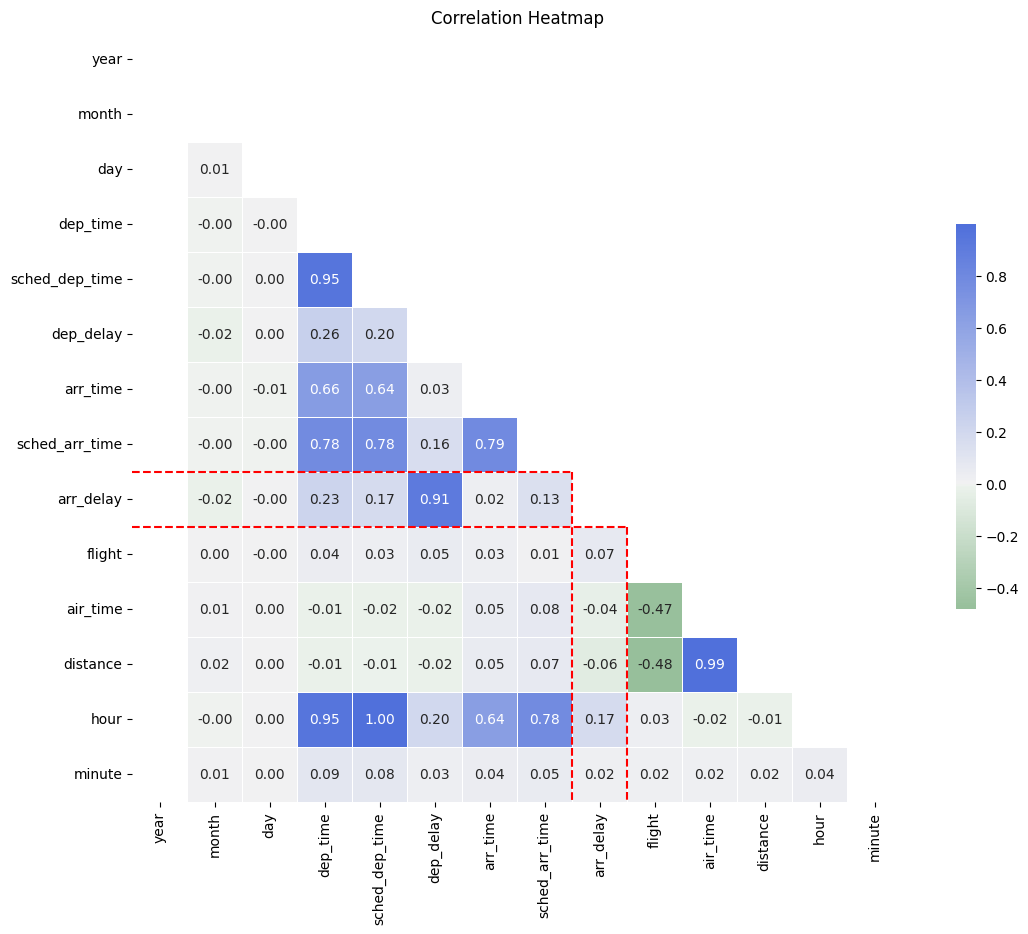


Correlations of arr_delay variable:
year                   NaN
month            -0.017382
day              -0.000319
dep_time          0.232306
sched_dep_time    0.173896
dep_delay         0.914803
arr_time          0.024482
sched_arr_time    0.133261
arr_delay         1.000000
flight            0.072862
air_time         -0.035297
distance         -0.061868
hour              0.173456
minute            0.021522
Name: arr_delay, dtype: float64


In [36]:
# CORRELATION HEAT MAP OF NUMERIC VALUES

# draw the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# get the index of the 'dep_delay' column/row
index_arr = list(corr.columns).index('arr_delay')

# outline the 'dep_delay' column and row
plt.hlines([index_arr], xmin=0, xmax=index_arr, color='red', linestyles='dashed')
plt.hlines([index_arr+1], xmin=0, xmax=index_arr+1, color='red', linestyles='dashed')
plt.vlines([index_arr], ymin=index_arr, ymax=len(corr.columns), color='red', linestyles='dashed')
plt.vlines([index_arr+1], ymin=index_arr+1, ymax=len(corr.columns), color='red', linestyles='dashed')

plt.title('Correlation Heatmap')
plt.show()

print()
print('Correlations of arr_delay variable:' )
print(corr['arr_delay'])

ARRIVAL DELAY: CATEGORICAL DATA ANALYSIS (CARRIER, DESTINATION, DISTANCE)

In [37]:
# ARRIVAL DELAY BY CARRIER
# In the following, the $ of arrivals delayed by over X minutes is calculated for each carrier
# the output is sorted descending by % departures delayed by over 30 minutes

medians = df_flights_nona.groupby('carrier')['arr_delay'].median()

# calculate the number of flights to each destination
num_flights_carrier = df_flights_nona.groupby('carrier').size()

# calculate the percentage of flights with delays > 0
delayed_arr_flights_carrier = df_flights_nona[df_flights_nona['arr_delay'] > 0].groupby('carrier').size()
percentage_arr_delay_carrier = (delayed_arr_flights_carrier / num_flights_carrier) * 100

# calculate the number of flights with delays > 30
arr_delay_over_30_carrier = df_flights_nona[df_flights_nona['arr_delay'] > 30].groupby('carrier').size()
percentage_arr_delay_over_30_carrier = (arr_delay_over_30_carrier / num_flights_carrier) * 100

# calculate the number of flights with delays > 120
arr_delay_over_120_carrier = df_flights_nona[df_flights_nona['arr_delay'] > 120].groupby('carrier').size()
percentage_arr_delay_over_120_carrier = (arr_delay_over_120_carrier / num_flights_carrier) * 100

# combine the series into a dataframe
df_arr_delay_carrier = pd.DataFrame({
    'MedianDelay': medians,
    'NumFlights': num_flights_carrier,
    'PercentageDelaysOver0': percentage_arr_delay_carrier,
    'PercentageDelaysOver30': percentage_arr_delay_over_30_carrier,
    'PercentageDelaysOver120': percentage_arr_delay_over_120_carrier
})

# sort by median delay
top_arr_delay_carrier = df_arr_delay_carrier.sort_values(by='PercentageDelaysOver30', ascending=False)

print(top_arr_delay_carrier)

# most medians are negative, which makes sense as airlines incorporate buffer times, which are often not needed
# output slightly different than departure delay results -> maybe airlines have different buffer times, weather conditions, destinations

         MedianDelay  NumFlights  PercentageDelaysOver0  \
carrier                                                   
F9               6.0         681              57.562408   
YV              -2.0         544              47.426471   
EV              -1.0       51108              47.906394   
FL               5.0        3175              59.685039   
OO              -7.0          29              34.482759   
9E              -7.0       17294              38.377472   
MQ              -1.0       25037              46.702880   
B6              -3.0       54049              43.680734   
WN              -3.0       12044              44.038525   
UA              -6.0       57782              38.458343   
VX              -9.0        5116              34.128225   
AA              -9.0       31947              33.511754   
DL              -8.0       47658              34.439129   
US              -6.0       19831              37.058141   
AS             -17.0         709              26.657264 

In [39]:
# TOP(worst) 15 DESTINATIONS BY ARRIVAL DELAY
# sorted by % of srrival delays over 30 minutes
# expected to be similar as list by departure delay
medians = df_flights_nona.groupby('dest')['arr_delay'].median()

# calculate the number of flights to each destination
num_flights_dest = df_flights_nona.groupby('dest').size()

# calculate the average distance to each destination, because slight deviations
distance_dest = df_flights_nona.groupby('dest')['distance'].mean().astype(int)

# calculate the percentage of flights with delays > 0
delayed_arr_flights_dest = df_flights_nona[df_flights_nona['arr_delay'] > 0].groupby('dest').size()
percentage_arr_delay_dest = (delayed_arr_flights_dest / num_flights_dest) * 100

# calculate the number of flights with arrival delays > 30
delayed_arr_over_30_dest = df_flights_nona[df_flights_nona['arr_delay'] > 30].groupby('dest').size()
percentage_arr_delay_over_30_dest = (delayed_arr_over_30_dest / num_flights_dest).fillna(0)* 100

# calculate the number of flights with arrival delays > 30
delayed_arr_over_120_dest = df_flights_nona[df_flights_nona['arr_delay'] > 120].groupby('dest').size()
percentage_arr_delay_over_120_dest = (delayed_arr_over_120_dest / num_flights_dest).fillna(0) * 100

# combine the series into a dataframe
df_arr_delay_dest = pd.DataFrame({
    'Distance': distance_dest,
    'MedianDelay': medians,
    'NumFlights': num_flights_dest,
    'PercentageDelaysOver0': percentage_arr_delay_dest,
    'PercentageDelaysOver30': percentage_arr_delay_over_30_dest,
    'PercentageDelaysOver120': percentage_arr_delay_over_120_dest
})

# sort by median delay and select top 15
top_arr_delay_dest = df_arr_delay_dest.sort_values(by='PercentageDelaysOver30', ascending=False).head(50)

print(top_arr_delay_dest)

      Distance  MedianDelay  NumFlights  PercentageDelaysOver0  \
dest                                                             
CAE        603         28.0         106              82.075472   
OKC       1325         16.0         315              63.809524   
JAC       1875         15.0          21              80.952381   
TUL       1215         14.0         294              65.646259   
TYS        638          2.0         578              53.114187   
DSM       1020          0.0         523              49.713193   
BHM        865         -2.0         269              44.981413   
MSN        803          1.0         556              51.258993   
RIC        281          1.0        2346              50.980392   
CRW        444         -1.5         134              47.761194   
GSP        595         -0.5         790              48.227848   
SMF       2521          4.0         282              53.191489   
MCI       1097          0.0        1885              48.488064   
ALB       

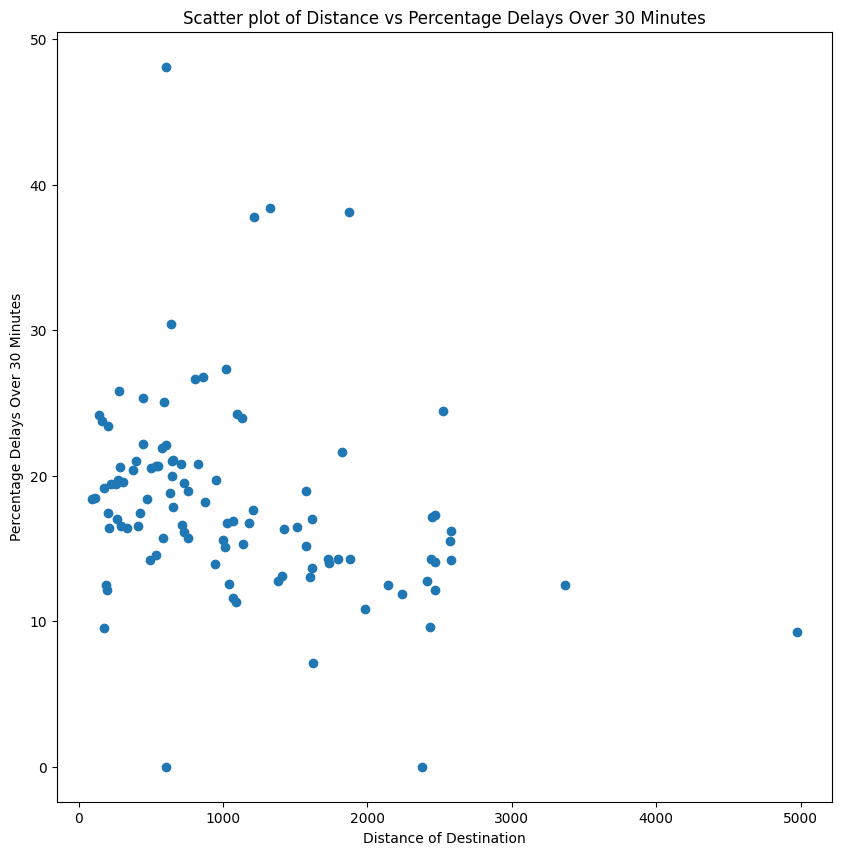

In [40]:
# scatter plots to check correlation betweeen distance and PercentageDelaysOver30
plt.figure(figsize=(10, 10))
plt.scatter(distance_dest, percentage_arr_delay_over_30_dest)
plt.xlabel('Distance of Destination')
plt.ylabel('Percentage Delays Over 30 Minutes')
plt.title('Scatter plot of Distance vs Percentage Delays Over 30 Minutes')
plt.show()
# distance and arrival delay don't seem correlated

PREDICT IF DEPARTURE DELAYED

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

Regressors choise:

- combination of numeric columns which do not contain redundant information: sched_dep_time
- categorical columns adjusted as binary variables, which exhibited signs of correlation in the ananlysis above

In [96]:
df_flights_pred = df_flights_nona # so we don't mess with the data frame above

# predictive model
# add new binary variable, which says if flight delayed more than 30 minutes
df_flights_pred['delayed30'] = np.where(df_flights_pred['dep_delay']>30, 1, 0)

# dummy variables for categorical data
df_flights_pred = pd.get_dummies(df_flights_pred, columns=['origin', 'carrier'])

# define regressors and regressant
feature_cols = ['sched_dep_time', 'month'] + [col for col in df_flights_pred.columns if 'origin_' in col or 'carrier_' in col]
X = df_flights_pred[feature_cols]
y = df_flights_pred[['delayed30']]

In [97]:
print(X.head())
print()
print(y.head())

   sched_dep_time  month  origin_EWR  origin_JFK  origin_LGA  carrier_9E  \
0             515      1        True       False       False       False   
1             529      1       False       False        True       False   
2             540      1       False        True       False       False   
3             545      1       False        True       False       False   
4             600      1       False       False        True       False   

   carrier_AA  carrier_AS  carrier_B6  carrier_DL  ...  carrier_F9  \
0       False       False       False       False  ...       False   
1       False       False       False       False  ...       False   
2        True       False       False       False  ...       False   
3       False       False        True       False  ...       False   
4       False       False       False        True  ...       False   

   carrier_FL  carrier_HA  carrier_MQ  carrier_OO  carrier_UA  carrier_US  \
0       False       False       False       F

In [98]:
# split into training and test(evaluation) data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [99]:
print(X_train.head())
print()
print(X_test.head())
print()
print(y_train.head())
print()
print(y_test.head)

        sched_dep_time  month  origin_EWR  origin_JFK  origin_LGA  carrier_9E  \
240780            1706      6       False        True       False       False   
331418             835      9        True       False       False       False   
208188            1900      5       False       False        True       False   
310743            2146      9       False        True       False       False   
186358            1355      4        True       False       False       False   

        carrier_AA  carrier_AS  carrier_B6  carrier_DL  ...  carrier_F9  \
240780       False       False        True       False  ...       False   
331418       False       False       False       False  ...       False   
208188       False       False       False       False  ...       False   
310743       False       False        True       False  ...       False   
186358       False       False       False       False  ...       False   

        carrier_FL  carrier_HA  carrier_MQ  carrier_OO  carrie

In [100]:
# apply logistic regression
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

# predict 'delayed'
y_pred = logreg.predict(X_test)

# evaluate performance
# print("Classification Report")
# print(classification_report(y_test, y_pred, zero_division=1))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
# predictive model is always betting on 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix
[[55653     0]
 [ 9817     0]]


Interpretation of the Confusion Matrix:
The top left cell (55653) represents the True Positives: Class 0 instances that were correctly classified as Class 0.
The top right cell (0) represents the False Positives: Class 0 instances that were incorrectly classified as Class 1.
The bottom left cell (9817) represents the False Negatives: Class 1 instances that were incorrectly classified as Class 0.
The bottom right cell (0) represents the True Negatives: Class 1 instances that were correctly classified as Class 1.